In [39]:
import pandas as pd
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
output_gene_ranking_path = "data/out_gene_rankings_bc.csv"
df_apu_labels = pd.read_csv(output_gene_ranking_path, sep=" ", header=None)
df_apu_labels.columns = ["name", "out", "rank"]
df_apu_labels

,name,out,rank
0,cg15694422_MGLL,6.476331,1
1,cg22644321_TRIB1,7.266330,1
2,cg26582754_PHACTR2,7.297525,1
3,cg20758823_RUNX2,7.385049,1
4,cg03688134_PLXNC1,7.382869,1
...,...,...,...
1985,cg00693000_TSPAN19,1.599745,1
1986,cg18098750_TMED7-TICAM2,1.599745,1
1987,cg18098750_TICAM2,1.599745,1
1988,cg21510680_VAV3-AS1,1.599745,1


In [41]:
APU_scores_df = df_apu_labels[["name", "out"]]
APU_scores_df

,name,out
0,cg15694422_MGLL,6.476331
1,cg22644321_TRIB1,7.266330
2,cg26582754_PHACTR2,7.297525
3,cg20758823_RUNX2,7.385049
4,cg03688134_PLXNC1,7.382869
...,...,...
1985,cg00693000_TSPAN19,1.599745
1986,cg18098750_TMED7-TICAM2,1.599745
1987,cg18098750_TICAM2,1.599745
1988,cg21510680_VAV3-AS1,1.599745


In [42]:
df_seeds = pd.read_csv("data/seed_features_bc.csv", sep="\t", header=None)
train_seeds_list = df_seeds.iloc[:, 0].tolist()
len(train_seeds_list)

197

In [43]:
APU_scores_df_not_seeds = APU_scores_df[~APU_scores_df['name'].isin(train_seeds_list)]
APU_scores_df_not_seeds.shape

(1814, 2)

In [44]:
APU_scores_df_not_seeds = APU_scores_df_not_seeds.sort_values(by = "out", ascending = False)
APU_scores_df_not_seeds

,name,out
27,cg02927618_ANKRD13A,146.395702
303,cg12248073_MCF2L2,146.395477
398,cg10053235_RAD51B,146.395112
320,cg16346422_SLC22A18AS,146.394984
319,cg16346422_SLC22A18,146.394984
...,...,...
1951,cg14751669_WFDC10B,1.599745
1892,cg22055815_C5orf39,1.599745
1893,cg03723510_C5orf39,1.599745
1959,cg24879257_SLC25A1,1.599745


In [45]:
pseudo_labels = pd.qcut(x = APU_scores_df_not_seeds["out"], q = 4, labels = ["RN", "LN", "WN", "LP"])
print(pseudo_labels)
APU_scores_df_not_seeds["label"] = pseudo_labels
APU_scores_seeds = APU_scores_df[APU_scores_df['name'].isin(train_seeds_list)]
APU_scores_seeds["label"] = "P"
APU_scores_seeds

27      LP
303     LP
398     LP
320     LP
319     LP
        ..
1951    RN
1892    RN
1893    RN
1959    RN
1989    RN
Name: out, Length: 1814, dtype: category
Categories (4, object): ['RN' < 'LN' < 'WN' < 'LP']


/tmp/ipykernel_1745859/1479929415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  APU_scores_seeds["label"] = "P"


,name,out,label
0,cg15694422_MGLL,6.476331,P
1,cg22644321_TRIB1,7.266330,P
2,cg26582754_PHACTR2,7.297525,P
3,cg20758823_RUNX2,7.385049,P
4,cg03688134_PLXNC1,7.382869,P
...,...,...,...
1841,cg06713675_EXOSC9,1.599745,P
1842,cg05635388_EXOSC9,1.599745,P
1843,cg05332652_TCONS_00029157,1.599745,P
1844,cg02409829_TCONS_00029157,1.599745,P


In [46]:
genes_labels_df = pd.concat([APU_scores_seeds, APU_scores_df_not_seeds])
genes_labels_df['name'] = genes_labels_df['name'].astype(str)
genes_labels_df

,name,out,label
0,cg15694422_MGLL,6.476331,P
1,cg22644321_TRIB1,7.266330,P
2,cg26582754_PHACTR2,7.297525,P
3,cg20758823_RUNX2,7.385049,P
4,cg03688134_PLXNC1,7.382869,P
...,...,...,...
1951,cg14751669_WFDC10B,1.599745,RN
1892,cg22055815_C5orf39,1.599745,RN
1893,cg03723510_C5orf39,1.599745,RN
1959,cg24879257_SLC25A1,1.599745,RN


In [47]:
nedbit_path = "data/nedbit_features_bc.csv"
gene_features_df = pd.read_csv(nedbit_path, sep=",")
gene_features_df

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg15694422_MGLL,1,86,1,0.835494,1.031676e+02,1.093121,0.966721
1,cg22644321_TRIB1,1,685,1,0.896282,1.213205e+02,0.791046,0.112984
2,cg26582754_PHACTR2,1,305,1,0.877714,1.069864e+02,0.885918,0.322500
3,cg20758823_RUNX2,1,630,1,0.896851,1.161173e+02,0.730681,0.133099
4,cg03688134_PLXNC1,1,614,1,0.896169,1.159991e+02,0.732772,0.138262
...,...,...,...,...,...,...,...,...
1985,cg00693000_TSPAN19,-99,1,0,0.000000,1.106418e-305,0.000000,0.000000
1986,cg18098750_TMED7-TICAM2,-99,1,0,0.000000,1.106418e-305,0.000000,0.000000
1987,cg18098750_TICAM2,-99,1,0,0.000000,1.106418e-305,0.000000,0.000000
1988,cg21510680_VAV3-AS1,-99,1,0,0.000000,1.106418e-305,0.000000,0.000000


In [48]:
features_and_labels_df = gene_features_df.merge(genes_labels_df, on = "name")
features_and_labels_df["label"] = features_and_labels_df["label"].map({"P": 0, "LP": 1, "WN": 2, "LN":3, "RN":4})
features_and_labels_df["label_binary"] = features_and_labels_df["label"].map({0: 0, 1: 1, 2: 1, 3:1, 4:1})
features_and_labels_df.pop("class") #removing class attribute
features_and_labels_df.pop("out")
features_and_labels_df

,name,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,label,label_binary
0,cg15694422_MGLL,86,1,0.835494,1.031676e+02,1.093121,0.966721,0,0
1,cg22644321_TRIB1,685,1,0.896282,1.213205e+02,0.791046,0.112984,0,0
2,cg26582754_PHACTR2,305,1,0.877714,1.069864e+02,0.885918,0.322500,0,0
3,cg20758823_RUNX2,630,1,0.896851,1.161173e+02,0.730681,0.133099,0,0
4,cg03688134_PLXNC1,614,1,0.896169,1.159991e+02,0.732772,0.138262,0,0
...,...,...,...,...,...,...,...,...,...
1985,cg00693000_TSPAN19,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1
1986,cg18098750_TMED7-TICAM2,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1
1987,cg18098750_TICAM2,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1
1988,cg21510680_VAV3-AS1,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1


In [49]:
nebit_features = features_and_labels_df.iloc[:, 2:7]
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.835494,1.031676e+02,1.093121,0.966721
1,1,0.896282,1.213205e+02,0.791046,0.112984
2,1,0.877714,1.069864e+02,0.885918,0.322500
3,1,0.896851,1.161173e+02,0.730681,0.133099
4,1,0.896169,1.159991e+02,0.732772,0.138262
...,...,...,...,...,...
1985,0,0.000000,1.106418e-305,0.000000,0.000000
1986,0,0.000000,1.106418e-305,0.000000,0.000000
1987,0,0.000000,1.106418e-305,0.000000,0.000000
1988,0,0.000000,1.106418e-305,0.000000,0.000000


In [50]:
# normalise NetShort feature

from sklearn.preprocessing import normalize, RobustScaler

netshort = np.array(nebit_features["NetShort"].tolist())
netshort = netshort.reshape(-1, 1)
print(len(netshort), netshort.shape)
transformer = RobustScaler().fit(netshort)
#norm_netshort = normalize(netshort, norm="l2")
norm_netshort = transformer.transform(netshort)
norm_netshort

1990 (1990, 1)


array([[ 0.35521804],
       [ 0.57822681],
       [ 0.40213208],
       ...,
       [-0.91219821],
       [-0.91219821],
       [-0.91219821]])

In [51]:
nebit_features["NetShort"] = norm_netshort
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.835494,0.355218,1.093121,0.966721
1,1,0.896282,0.578227,0.791046,0.112984
2,1,0.877714,0.402132,0.885918,0.322500
3,1,0.896851,0.514305,0.730681,0.133099
4,1,0.896169,0.512853,0.732772,0.138262
...,...,...,...,...,...
1985,0,0.000000,-0.912198,0.000000,0.000000
1986,0,0.000000,-0.912198,0.000000,0.000000
1987,0,0.000000,-0.912198,0.000000,0.000000
1988,0,0.000000,-0.912198,0.000000,0.000000


In [52]:
features_and_labels_df

,name,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,label,label_binary
0,cg15694422_MGLL,86,1,0.835494,1.031676e+02,1.093121,0.966721,0,0
1,cg22644321_TRIB1,685,1,0.896282,1.213205e+02,0.791046,0.112984,0,0
2,cg26582754_PHACTR2,305,1,0.877714,1.069864e+02,0.885918,0.322500,0,0
3,cg20758823_RUNX2,630,1,0.896851,1.161173e+02,0.730681,0.133099,0,0
4,cg03688134_PLXNC1,614,1,0.896169,1.159991e+02,0.732772,0.138262,0,0
...,...,...,...,...,...,...,...,...,...
1985,cg00693000_TSPAN19,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1
1986,cg18098750_TMED7-TICAM2,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1
1987,cg18098750_TICAM2,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1
1988,cg21510680_VAV3-AS1,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1


In [69]:
df_labels = features_and_labels_df[["name", "label", "label_binary"]]
df_labels

,name,label,label_binary
0,cg15694422_MGLL,0,0
1,cg22644321_TRIB1,0,0
2,cg26582754_PHACTR2,0,0
3,cg20758823_RUNX2,0,0
4,cg03688134_PLXNC1,0,0
...,...,...,...
1985,cg00693000_TSPAN19,4,1
1986,cg18098750_TMED7-TICAM2,4,1
1987,cg18098750_TICAM2,4,1
1988,cg21510680_VAV3-AS1,4,1


In [70]:
labels = df_labels["label_binary"].tolist()

In [71]:
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.835494,0.355218,1.093121,0.966721
1,1,0.896282,0.578227,0.791046,0.112984
2,1,0.877714,0.402132,0.885918,0.322500
3,1,0.896851,0.514305,0.730681,0.133099
4,1,0.896169,0.512853,0.732772,0.138262
...,...,...,...,...,...
1985,0,0.000000,-0.912198,0.000000,0.000000
1986,0,0.000000,-0.912198,0.000000,0.000000
1987,0,0.000000,-0.912198,0.000000,0.000000
1988,0,0.000000,-0.912198,0.000000,0.000000


In [72]:
n_neighbors=50
min_dist=0.99
metric='correlation'

embeddings = umap.UMAP(n_neighbors=n_neighbors, 
                       min_dist=min_dist, 
                       metric='correlation').fit_transform(nebit_features)

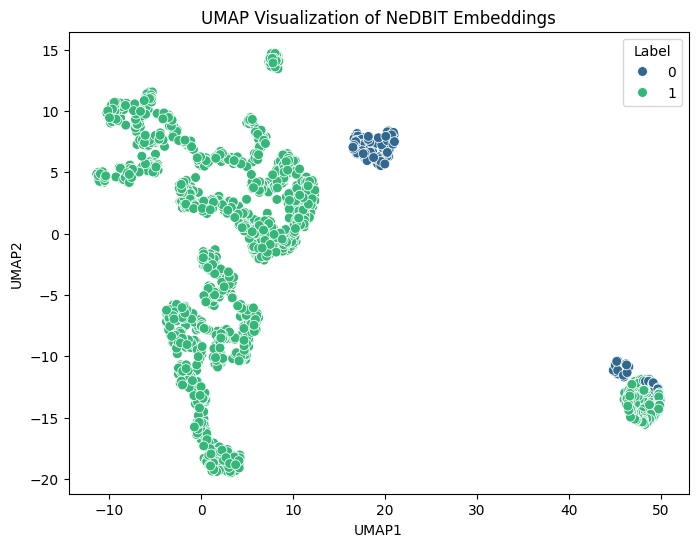

In [73]:
# Create a DataFrame with UMAP components and labels
data = {"UMAP1": embeddings[:, 0], "UMAP2": embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=1.0)
#, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT Embeddings")
plt.savefig("data/umap_NeDBIT_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [74]:
df_labels_pred_P = features_and_labels_df[features_and_labels_df["label"] == 0]
df_labels_pred_P

,name,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,label,label_binary
0,cg15694422_MGLL,86,1,0.835494,1.031676e+02,1.093121,0.966721,0,0
1,cg22644321_TRIB1,685,1,0.896282,1.213205e+02,0.791046,0.112984,0,0
2,cg26582754_PHACTR2,305,1,0.877714,1.069864e+02,0.885918,0.322500,0,0
3,cg20758823_RUNX2,630,1,0.896851,1.161173e+02,0.730681,0.133099,0,0
4,cg03688134_PLXNC1,614,1,0.896169,1.159991e+02,0.732772,0.138262,0,0
...,...,...,...,...,...,...,...,...,...
1841,cg06713675_EXOSC9,1,0,0.000000,1.106418e-305,0.000000,0.000000,0,0
1842,cg05635388_EXOSC9,1,0,0.000000,1.106418e-305,0.000000,0.000000,0,0
1843,cg05332652_TCONS_00029157,1,0,0.000000,1.106418e-305,0.000000,0.000000,0,0
1844,cg02409829_TCONS_00029157,1,0,0.000000,1.106418e-305,0.000000,0.000000,0,0


In [75]:
df_labels_pred_LP = features_and_labels_df[features_and_labels_df["label"] == 1]
df_labels_pred_LP

,name,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,label,label_binary
27,cg02927618_ANKRD13A,622,2,1.987614,82.56437,0.056585,0.098957,1,1
28,cg12859943_SNX14,609,2,1.987074,85.55850,0.032549,0.099511,1,1
29,cg26006714_ANAPC16,603,2,1.987919,83.06935,0.029409,0.097284,1,1
30,cg23494744_PHKG2,598,2,1.987163,85.31958,0.033521,0.100414,1,1
35,cg07734159_VCL,611,2,1.987554,83.28935,0.032143,0.097942,1,1
...,...,...,...,...,...,...,...,...,...
1957,cg01875052_JARID2,4,3,2.991697,15.75644,0.000015,0.001093,1,1
1963,cg22273830_SLC43A2,3,3,2.996551,15.61513,0.000004,0.000243,1,1
1964,cg00849943_HPSE,3,3,2.998662,15.18782,0.000002,0.000175,1,1
1968,cg22516376_MTSS1,1,3,2.992963,15.26596,0.000003,0.000240,1,1


In [76]:
df_labels_pred_WN = features_and_labels_df[features_and_labels_df["label"] == 2]
df_labels_pred_WN

,name,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,label,label_binary
20,cg00883212_RAPGEF4,539,2,1.987947,83.78797,0.027888,0.099178,2,1
21,cg25608645_IMPAD1,588,2,1.987346,85.28733,0.030544,0.098981,2,1
23,cg20773479_CEP72,591,2,1.987652,83.04063,0.031042,0.098542,2,1
24,cg17313269_TRIM38,579,2,1.987995,82.85610,0.028065,0.097154,2,1
25,cg19205376_PTPRJ,574,2,1.987566,84.13421,0.032259,0.100937,2,1
...,...,...,...,...,...,...,...,...,...
1732,cg02840109_CDH2,561,2,1.997815,68.97360,0.005271,0.034431,2,1
1740,cg02731042_L3MBTL4,572,2,1.996931,76.84532,0.005869,0.036082,2,1
1751,cg18686527_RAB34,598,2,1.996919,76.76467,0.006323,0.036747,2,1
1760,cg13615030_AK1,569,2,1.996403,77.00149,0.006957,0.037912,2,1


In [77]:
df_labels_pred_LN = features_and_labels_df[features_and_labels_df["label"] == 3]
df_labels_pred_LN

,name,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,label,label_binary
22,cg14865086_COPS3,502,2,1.990097,77.93661,0.021004,0.093326,3,1
65,cg09403558_EPG5,510,2,1.990084,74.28619,0.022866,0.094121,3,1
137,cg26077615_PPFIA1,496,2,1.989244,80.60380,0.031853,0.095974,3,1
139,cg05785120_DMC1,441,2,1.989051,78.07668,0.018632,0.090848,3,1
140,cg16627180_MYH15,501,2,1.988868,72.74015,0.021956,0.095724,3,1
...,...,...,...,...,...,...,...,...,...
1823,cg13261825_SLIT1,58,2,1.996560,62.93029,0.000696,0.009253,3,1
1824,cg17046776_ST5,19,2,1.994654,62.53054,0.000346,0.004068,3,1
1830,cg21462596_PRTN3,11,2,1.988677,15.81428,0.249569,0.007452,3,1
1833,cg01049417_SCHIP1,13,2,1.992244,61.31693,0.000376,0.002932,3,1


In [78]:
df_labels_pred_RN = features_and_labels_df[features_and_labels_df["label"] == 4]
df_labels_pred_RN

,name,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,label,label_binary
555,cg11745455_KIAA0825,155,0,0.0,1.106418e-305,0.0,0.0,4,1
556,cg15559940_PCCA,232,0,0.0,1.106418e-305,0.0,0.0,4,1
557,cg10592926_ZDHHC14,91,0,0.0,1.106418e-305,0.0,0.0,4,1
559,cg23719508_IQCE,178,0,0.0,1.106418e-305,0.0,0.0,4,1
562,cg19688999_IPMK,196,0,0.0,1.106418e-305,0.0,0.0,4,1
...,...,...,...,...,...,...,...,...,...
1985,cg00693000_TSPAN19,1,0,0.0,1.106418e-305,0.0,0.0,4,1
1986,cg18098750_TMED7-TICAM2,1,0,0.0,1.106418e-305,0.0,0.0,4,1
1987,cg18098750_TICAM2,1,0,0.0,1.106418e-305,0.0,0.0,4,1
1988,cg21510680_VAV3-AS1,1,0,0.0,1.106418e-305,0.0,0.0,4,1


In [79]:
df_merged_signals = pd.read_csv("data/merged_signals_bc.csv", sep="\t", engine="c")
df_merged_signals

,cg12467416_SEPT9,cg21410897_AAK1,cg21156511_NPLOC4,cg24567897_NIPAL2,cg05421487_AKAP10,cg18546155_NCOA1,cg22689269_EXO5,cg15694422_MGLL,cg02116768_FOXK2,cg04218548_CAMTA1,...,cg21442881_DENND3,cg12664119_TBX15,cg04709185_LINC00548,cg17334808_ARPP21,cg10363951_CHST9,cg24466294_ACAA1,cg16768018_ZIC4,cg18784435_CRMP1,cg17495501_CHD6,cg11910611_SLC4A5
0,0.442869,0.409950,0.625603,0.900918,0.889177,0.913062,0.947388,0.420649,0.460033,0.827662,...,0.676921,0.339713,0.746902,0.938785,0.142266,0.964044,0.382405,0.197748,0.937212,0.919741
1,0.470753,0.388715,0.657697,0.846108,0.881948,0.888919,0.937989,0.315654,0.534132,0.845404,...,0.826626,0.378339,0.708868,0.870688,0.176146,0.975353,0.467031,0.263854,0.919799,0.878617
2,0.435133,0.406474,0.585801,0.860885,0.890532,0.870431,0.932141,0.371301,0.461211,0.812662,...,0.742211,0.352499,0.814267,0.869770,0.121742,0.968381,0.446234,0.184378,0.924966,0.860332
3,0.432686,0.365672,0.546524,0.879930,0.845392,0.896671,0.887598,0.265431,0.472303,0.818183,...,0.642696,0.371060,0.803651,0.915799,0.107682,0.963129,0.306597,0.262053,0.957454,0.950183
4,0.414197,0.300900,0.519735,0.925803,0.924483,0.950495,0.957536,0.235579,0.392235,0.842532,...,0.664597,0.321245,0.770658,0.945856,0.112607,0.971626,0.348069,0.159068,0.945299,0.945003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.525516,0.524446,0.722934,0.721116,0.776128,0.740774,0.773703,0.560614,0.663921,0.727816,...,0.841846,0.443122,0.783983,0.815054,0.238617,0.963845,0.509797,0.213721,0.892865,0.871261
76,0.452324,0.480424,0.656563,0.808964,0.854183,0.862328,0.883234,0.483471,0.508202,0.797696,...,0.761701,0.402300,0.765263,0.887526,0.214909,0.973547,0.506271,0.204025,0.928430,0.911477
77,0.452633,0.431355,0.602582,0.847401,0.861224,0.849006,0.879325,0.521094,0.490106,0.822492,...,0.710117,0.356679,0.707115,0.909535,0.170923,0.967806,0.388762,0.191701,0.954641,0.926669
78,0.438368,0.457812,0.641296,0.842197,0.837455,0.883265,0.876846,0.464730,0.607031,0.801699,...,0.713256,0.376771,0.771145,0.937799,0.125088,0.956654,0.400112,0.250938,0.944533,0.935776


In [80]:
feature_names = df_labels["name"].tolist()

In [81]:
dnam_signals = df_merged_signals[feature_names]
dnam_signals

,cg15694422_MGLL,cg22644321_TRIB1,cg26582754_PHACTR2,cg20758823_RUNX2,cg03688134_PLXNC1,cg19397277_PAG1,cg24597363_MAEA,cg05849676_CLEC12B,cg22014325_RAMP1,cg21627980_DTNBP1,...,cg25771743_PGR,cg25771743_LOC101054525,cg14305943_SNORA19,cg14305943_EIF3A,cg00693000_LRRIQ1,cg00693000_TSPAN19,cg18098750_TMED7-TICAM2,cg18098750_TICAM2,cg21510680_VAV3-AS1,cg21510680_VAV3
0,0.420649,0.312701,0.413432,0.430651,0.476208,0.509785,0.727852,0.479563,0.534548,0.714092,...,0.873200,0.873200,0.944177,0.944177,0.941397,0.941397,0.002605,0.002605,0.025081,0.025081
1,0.315654,0.229696,0.359373,0.508906,0.497923,0.711849,0.799968,0.583322,0.632019,0.807499,...,0.885583,0.885583,0.974055,0.974055,0.943794,0.943794,0.041608,0.041608,0.032688,0.032688
2,0.371301,0.243923,0.298765,0.430397,0.452600,0.561788,0.760008,0.549297,0.483386,0.680031,...,0.901523,0.901523,0.960327,0.960327,0.939461,0.939461,0.043322,0.043322,0.074347,0.074347
3,0.265431,0.194979,0.326456,0.333302,0.401843,0.422361,0.559697,0.403036,0.519919,0.660694,...,0.922820,0.922820,0.952582,0.952582,0.957977,0.957977,0.067709,0.067709,0.016312,0.016312
4,0.235579,0.192450,0.349825,0.320553,0.362561,0.393438,0.580172,0.467984,0.445557,0.592195,...,0.928025,0.928025,0.925792,0.925792,0.958520,0.958520,0.026621,0.026621,0.010695,0.010695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.560614,0.440183,0.496821,0.597685,0.639386,0.706363,0.871144,0.683096,0.736065,0.880335,...,0.935288,0.935288,0.961903,0.961903,0.918518,0.918518,0.032081,0.032081,0.010266,0.010266
76,0.483471,0.340785,0.488674,0.404161,0.471486,0.617296,0.753473,0.537596,0.701975,0.838957,...,0.860754,0.860754,0.896340,0.896340,0.944767,0.944767,0.016123,0.016123,0.016471,0.016471
77,0.521094,0.258195,0.407097,0.400028,0.509362,0.576948,0.717583,0.715657,0.627916,0.786407,...,0.814582,0.814582,0.962029,0.962029,0.962951,0.962951,0.008559,0.008559,0.009032,0.009032
78,0.464730,0.289059,0.511305,0.422716,0.454152,0.610103,0.724744,0.513202,0.605272,0.726685,...,0.878131,0.878131,0.928577,0.928577,0.931335,0.931335,0.012048,0.012048,0.006826,0.006826


In [82]:
dnam_signals_transpose = dnam_signals.transpose()
dnam_signals_transpose

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
cg15694422_MGLL,0.420649,0.315654,0.371301,0.265431,0.235579,0.429489,0.211561,0.344654,0.291120,0.246508,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
cg22644321_TRIB1,0.312701,0.229696,0.243923,0.194979,0.192450,0.275853,0.233757,0.233172,0.260231,0.176032,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
cg26582754_PHACTR2,0.413432,0.359373,0.298765,0.326456,0.349825,0.413166,0.329817,0.450359,0.378311,0.391891,...,0.435968,0.389566,0.494176,0.504004,0.452477,0.496821,0.488674,0.407097,0.511305,0.369165
cg20758823_RUNX2,0.430651,0.508906,0.430397,0.333302,0.320553,0.507053,0.422597,0.413848,0.436435,0.423015,...,0.510157,0.531396,0.537635,0.501953,0.448602,0.597685,0.404161,0.400028,0.422716,0.466858
cg03688134_PLXNC1,0.476208,0.497923,0.452600,0.401843,0.362561,0.578389,0.437428,0.471390,0.485310,0.504968,...,0.524155,0.601308,0.613859,0.570519,0.534431,0.639386,0.471486,0.509362,0.454152,0.507358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg00693000_TSPAN19,0.941397,0.943794,0.939461,0.957977,0.958520,0.947001,0.956511,0.940104,0.953033,0.919350,...,0.933521,0.908801,0.931969,0.927334,0.939433,0.918518,0.944767,0.962951,0.931335,0.939499
cg18098750_TMED7-TICAM2,0.002605,0.041608,0.043322,0.067709,0.026621,0.023205,0.038593,0.041721,0.038200,0.010956,...,0.023856,0.017611,0.024366,0.010701,0.020410,0.032081,0.016123,0.008559,0.012048,0.042355
cg18098750_TICAM2,0.002605,0.041608,0.043322,0.067709,0.026621,0.023205,0.038593,0.041721,0.038200,0.010956,...,0.023856,0.017611,0.024366,0.010701,0.020410,0.032081,0.016123,0.008559,0.012048,0.042355
cg21510680_VAV3-AS1,0.025081,0.032688,0.074347,0.016312,0.010695,0.032724,0.008994,0.007766,0.011281,0.019239,...,0.016913,0.010140,0.006837,0.014135,0.005002,0.010266,0.016471,0.009032,0.006826,0.018441


In [83]:
features_and_labels_df

,name,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,label,label_binary
0,cg15694422_MGLL,86,1,0.835494,1.031676e+02,1.093121,0.966721,0,0
1,cg22644321_TRIB1,685,1,0.896282,1.213205e+02,0.791046,0.112984,0,0
2,cg26582754_PHACTR2,305,1,0.877714,1.069864e+02,0.885918,0.322500,0,0
3,cg20758823_RUNX2,630,1,0.896851,1.161173e+02,0.730681,0.133099,0,0
4,cg03688134_PLXNC1,614,1,0.896169,1.159991e+02,0.732772,0.138262,0,0
...,...,...,...,...,...,...,...,...,...
1985,cg00693000_TSPAN19,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1
1986,cg18098750_TMED7-TICAM2,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1
1987,cg18098750_TICAM2,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1
1988,cg21510680_VAV3-AS1,1,0,0.000000,1.106418e-305,0.000000,0.000000,4,1


In [84]:
dnam_signals_transpose.to_csv("data/dnam_signals_transpose.csv")

In [85]:
dnam_signals_transpose = dnam_signals_transpose.reset_index()
dnam_signals_transpose

,index,0,1,2,3,4,5,6,7,8,...,70,71,72,73,74,75,76,77,78,79
0,cg15694422_MGLL,0.420649,0.315654,0.371301,0.265431,0.235579,0.429489,0.211561,0.344654,0.291120,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
1,cg22644321_TRIB1,0.312701,0.229696,0.243923,0.194979,0.192450,0.275853,0.233757,0.233172,0.260231,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
2,cg26582754_PHACTR2,0.413432,0.359373,0.298765,0.326456,0.349825,0.413166,0.329817,0.450359,0.378311,...,0.435968,0.389566,0.494176,0.504004,0.452477,0.496821,0.488674,0.407097,0.511305,0.369165
3,cg20758823_RUNX2,0.430651,0.508906,0.430397,0.333302,0.320553,0.507053,0.422597,0.413848,0.436435,...,0.510157,0.531396,0.537635,0.501953,0.448602,0.597685,0.404161,0.400028,0.422716,0.466858
4,cg03688134_PLXNC1,0.476208,0.497923,0.452600,0.401843,0.362561,0.578389,0.437428,0.471390,0.485310,...,0.524155,0.601308,0.613859,0.570519,0.534431,0.639386,0.471486,0.509362,0.454152,0.507358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,cg00693000_TSPAN19,0.941397,0.943794,0.939461,0.957977,0.958520,0.947001,0.956511,0.940104,0.953033,...,0.933521,0.908801,0.931969,0.927334,0.939433,0.918518,0.944767,0.962951,0.931335,0.939499
1986,cg18098750_TMED7-TICAM2,0.002605,0.041608,0.043322,0.067709,0.026621,0.023205,0.038593,0.041721,0.038200,...,0.023856,0.017611,0.024366,0.010701,0.020410,0.032081,0.016123,0.008559,0.012048,0.042355
1987,cg18098750_TICAM2,0.002605,0.041608,0.043322,0.067709,0.026621,0.023205,0.038593,0.041721,0.038200,...,0.023856,0.017611,0.024366,0.010701,0.020410,0.032081,0.016123,0.008559,0.012048,0.042355
1988,cg21510680_VAV3-AS1,0.025081,0.032688,0.074347,0.016312,0.010695,0.032724,0.008994,0.007766,0.011281,...,0.016913,0.010140,0.006837,0.014135,0.005002,0.010266,0.016471,0.009032,0.006826,0.018441


In [86]:
dnam_features = dnam_signals_transpose.iloc[:, 1:]
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.420649,0.315654,0.371301,0.265431,0.235579,0.429489,0.211561,0.344654,0.291120,0.246508,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
1,0.312701,0.229696,0.243923,0.194979,0.192450,0.275853,0.233757,0.233172,0.260231,0.176032,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
2,0.413432,0.359373,0.298765,0.326456,0.349825,0.413166,0.329817,0.450359,0.378311,0.391891,...,0.435968,0.389566,0.494176,0.504004,0.452477,0.496821,0.488674,0.407097,0.511305,0.369165
3,0.430651,0.508906,0.430397,0.333302,0.320553,0.507053,0.422597,0.413848,0.436435,0.423015,...,0.510157,0.531396,0.537635,0.501953,0.448602,0.597685,0.404161,0.400028,0.422716,0.466858
4,0.476208,0.497923,0.452600,0.401843,0.362561,0.578389,0.437428,0.471390,0.485310,0.504968,...,0.524155,0.601308,0.613859,0.570519,0.534431,0.639386,0.471486,0.509362,0.454152,0.507358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,0.941397,0.943794,0.939461,0.957977,0.958520,0.947001,0.956511,0.940104,0.953033,0.919350,...,0.933521,0.908801,0.931969,0.927334,0.939433,0.918518,0.944767,0.962951,0.931335,0.939499
1986,0.002605,0.041608,0.043322,0.067709,0.026621,0.023205,0.038593,0.041721,0.038200,0.010956,...,0.023856,0.017611,0.024366,0.010701,0.020410,0.032081,0.016123,0.008559,0.012048,0.042355
1987,0.002605,0.041608,0.043322,0.067709,0.026621,0.023205,0.038593,0.041721,0.038200,0.010956,...,0.023856,0.017611,0.024366,0.010701,0.020410,0.032081,0.016123,0.008559,0.012048,0.042355
1988,0.025081,0.032688,0.074347,0.016312,0.010695,0.032724,0.008994,0.007766,0.011281,0.019239,...,0.016913,0.010140,0.006837,0.014135,0.005002,0.010266,0.016471,0.009032,0.006826,0.018441


In [87]:
n_neighbors=50 #10 #5
min_dist=0.99 #0.99 #0.3
metric='correlation'

dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(dnam_features)

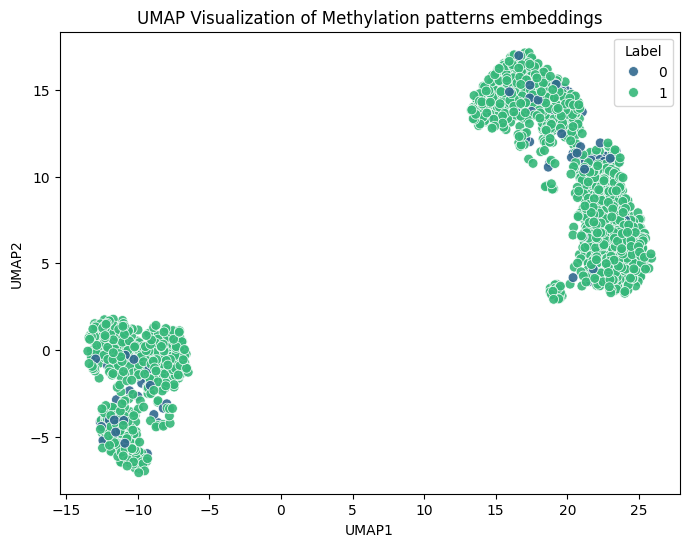

In [88]:
data = {"UMAP1": dnam_embeddings[:, 0], "UMAP2": dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of Methylation patterns embeddings")
plt.savefig("data/umap_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [89]:
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.835494,0.355218,1.093121,0.966721
1,1,0.896282,0.578227,0.791046,0.112984
2,1,0.877714,0.402132,0.885918,0.322500
3,1,0.896851,0.514305,0.730681,0.133099
4,1,0.896169,0.512853,0.732772,0.138262
...,...,...,...,...,...
1985,0,0.000000,-0.912198,0.000000,0.000000
1986,0,0.000000,-0.912198,0.000000,0.000000
1987,0,0.000000,-0.912198,0.000000,0.000000
1988,0,0.000000,-0.912198,0.000000,0.000000


In [90]:
#nebit_dnam_features = pd.concat([nebit_features, dnam_signals_transpose.iloc[:, 1:]], axis=1)
nebit_dnam_features = pd.concat([nebit_features, dnam_features], axis=1)
nebit_dnam_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,4,...,70,71,72,73,74,75,76,77,78,79
0,1,0.835494,0.355218,1.093121,0.966721,0.420649,0.315654,0.371301,0.265431,0.235579,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
1,1,0.896282,0.578227,0.791046,0.112984,0.312701,0.229696,0.243923,0.194979,0.192450,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
2,1,0.877714,0.402132,0.885918,0.322500,0.413432,0.359373,0.298765,0.326456,0.349825,...,0.435968,0.389566,0.494176,0.504004,0.452477,0.496821,0.488674,0.407097,0.511305,0.369165
3,1,0.896851,0.514305,0.730681,0.133099,0.430651,0.508906,0.430397,0.333302,0.320553,...,0.510157,0.531396,0.537635,0.501953,0.448602,0.597685,0.404161,0.400028,0.422716,0.466858
4,1,0.896169,0.512853,0.732772,0.138262,0.476208,0.497923,0.452600,0.401843,0.362561,...,0.524155,0.601308,0.613859,0.570519,0.534431,0.639386,0.471486,0.509362,0.454152,0.507358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,0,0.000000,-0.912198,0.000000,0.000000,0.941397,0.943794,0.939461,0.957977,0.958520,...,0.933521,0.908801,0.931969,0.927334,0.939433,0.918518,0.944767,0.962951,0.931335,0.939499
1986,0,0.000000,-0.912198,0.000000,0.000000,0.002605,0.041608,0.043322,0.067709,0.026621,...,0.023856,0.017611,0.024366,0.010701,0.020410,0.032081,0.016123,0.008559,0.012048,0.042355
1987,0,0.000000,-0.912198,0.000000,0.000000,0.002605,0.041608,0.043322,0.067709,0.026621,...,0.023856,0.017611,0.024366,0.010701,0.020410,0.032081,0.016123,0.008559,0.012048,0.042355
1988,0,0.000000,-0.912198,0.000000,0.000000,0.025081,0.032688,0.074347,0.016312,0.010695,...,0.016913,0.010140,0.006837,0.014135,0.005002,0.010266,0.016471,0.009032,0.006826,0.018441


In [91]:
n_neighbors=20 #10 #5
min_dist=0.8 #0.99 #0.3
metric='correlation'

nebit_dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_dnam_features)

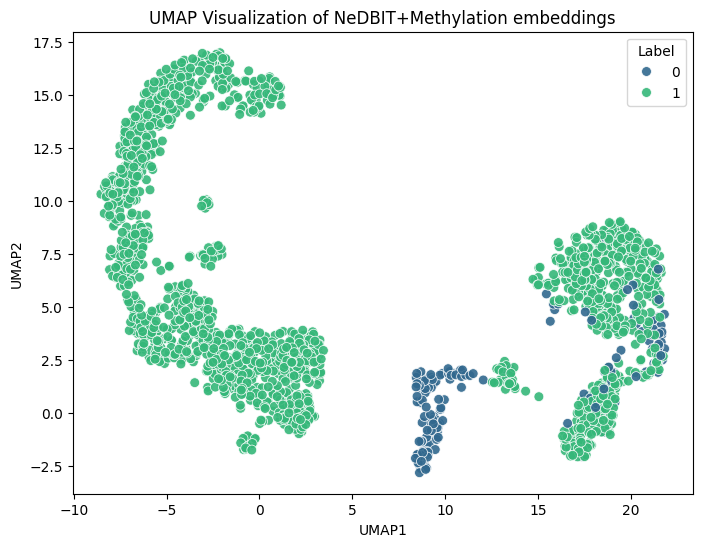

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a data frame with UMAP components and labels
data = {"UMAP1": nebit_dnam_embeddings[:, 0], "UMAP2": nebit_dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT+Methylation embeddings")
plt.savefig("data/umap_NeDBIT_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()